In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(0,1,11)#
y = np.linspace(0,1,11)
xx, yy = np.meshgrid(x,y,indexing='ij')#np.array()
def gi(i,j):
    return i+j*11

In [3]:
corners = np.array([[0,1,0,1],[0,0,1,1]])

In [4]:
i = np.arange(0,10)
j = np.arange(0,10)
ii,jj = np.meshgrid(i,j,indexing='ij')

10

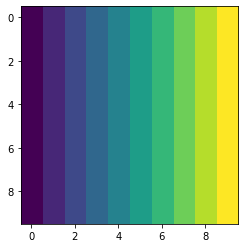

In [5]:
plt.imshow(jj)
len(i)

In [6]:
ii[:,:,None]+corners[None,None,0,:,]
corner_gi = gi(ii[:,:,None]+corners[None,None,0,:,],jj[:,:,None]+corners[None,None,1,:,])


In [7]:
corner_gi = corner_gi.reshape(100,4)

In [8]:
tri = np.vstack([corner_gi[:,:3],corner_gi[:,1:]])

In [9]:
xx.flatten().shape
print(np.max(tri))

120


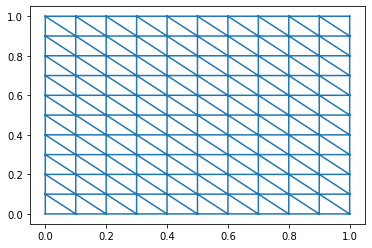

In [10]:
plt.triplot(xx.flatten(),yy.flatten(),tri)

In [11]:
def create_surface(bounding_box,nstep):
    x = np.linspace(bounding_box[0,0],bounding_box[1,0],nstep[0])#
    y = np.linspace(bounding_box[0,1],bounding_box[1,1],nstep[1])
    xx, yy = np.meshgrid(x,y,indexing='xy')
    def gi(i,j):
        return i+j*nstep[0]
    corners = np.array([[0,1,0,1],[0,0,1,1]])
    i = np.arange(0, nstep[0]-1)

    j = np.arange(0, nstep[1]-1)
    ii,jj = np.meshgrid(i,j,indexing='ij')
    corner_gi = gi(ii[:,:,None]+corners[None,None,0,:,],jj[:,:,None]+corners[None,None,1,:,])
    corner_gi = corner_gi.reshape((nstep[0]-1)*(nstep[1]-1),4)
    tri = np.vstack([corner_gi[:,:3],corner_gi[:,1:]])
    return tri, xx.flatten(),yy.flatten()

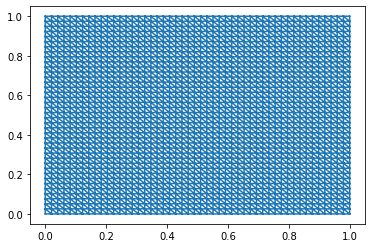

In [12]:
tri, xx, yy = create_surface(np.array([[0,0],[1,1]]),(50,40))
plt.triplot(xx,yy,tri)

In [13]:
def create_surface(bounding_box,nstep):
    x = np.linspace(bounding_box[0,0],bounding_box[1,0],nstep[0])#
    y = np.linspace(bounding_box[0,1],bounding_box[1,1],nstep[1])
    xx, yy = np.meshgrid(x,y,indexing='xy')
    def gi(i,j):
        return i+j*nstep[0]
    corners = np.array([[0,1,0,1],[0,0,1,1]])
    i = np.arange(0, nstep[0]-1)

    j = np.arange(0, nstep[1]-1)
    ii,jj = np.meshgrid(i,j,indexing='ij')
    corner_gi = gi(ii[:,:,None]+corners[None,None,0,:,],jj[:,:,None]+corners[None,None,1,:,])
    corner_gi = corner_gi.reshape((nstep[0]-1)*(nstep[1]-1),4)
    tri = np.vstack([corner_gi[:,:3],corner_gi[:,1:]])
    return tri, xx.flatten(),yy.flatten()
def create_box(bounding_box,nsteps):
    #top and bottom
    nsteps = np.array(nsteps)
    tri, xx, yy = create_surface(bounding_box[0:2,:],nsteps[0:2])
        
    print(xx.shape, yy.shape)


    zz = np.zeros(xx.shape)
    zz[:] = bounding_box[1,2]
    tri = np.vstack([tri,tri+np.max(tri)])
    xx = np.hstack([xx,xx])
    yy = np.hstack([yy,yy])
    
    z = np.zeros(zz.shape)
    z[:] = bounding_box[0,2]
    zz = np.hstack([zz,z])
    # y faces
    t, x, z = create_surface(bounding_box[:,[0,2]],nsteps[[0,2]])
    tri = np.vstack([tri,t+np.max(tri)])
    y = np.zeros(x.shape)
    y[:] = boundary_points[0,1]
    xx = np.hstack([xx,x])
    zz = np.hstack([zz,z])
    yy = np.hstack([yy,y])
    
    tri = np.vstack([tri,t+np.max(tri)])
    y[:] = boundary_points[1,1]
    xx = np.hstack([xx,x])
    zz = np.hstack([zz,z])
    yy = np.hstack([yy,y])
    print(xx.shape, yy.shape, zz.shape)

    # x faces
    t, y, z = create_surface(bounding_box[:,[1,2]],nsteps[[1,2]])
    tri = np.vstack([tri,t+np.max(tri)])
    x = np.zeros(y.shape)
    x[:] = boundary_points[0,0]
    xx = np.hstack([xx,x])
    zz = np.hstack([zz,z])
    yy = np.hstack([yy,y])
    
    tri = np.vstack([tri,t+np.max(tri)])
    x[:] = boundary_points[1,0]
    xx = np.hstack([xx,x])
    zz = np.hstack([zz,z])
    yy = np.hstack([yy,y])
    
    return tri, xx, yy, zz

In [14]:
origin = (0,0,0)
maximum = (10000,10000,5000)
boundary_points = np.zeros((2,3))
boundary_points[0,0] = origin[0] 
boundary_points[0,1] = origin[1] 
boundary_points[0,2] = origin[2]
boundary_points[1,0] = maximum[0]
boundary_points[1,1] = maximum[1]
boundary_points[1,2] = maximum[2]
tri, xx, yy, zz = create_box(boundary_points,(10,10,5))
n = 0
# for i in range(len(xx)):
#     if (xx[i],yy[i],zz[i]) in points:
#         tri[tri==i] = points[xx[i],yy[i],zz[i]]
#     points[(xx[i],yy[i],zz[i])] = n
#     tri[tri==i] = n
#     n+=1

# points_np = np.zeros((n,3))
# for k in points.keys():
#     points_np[points[k],:] = np.array(k)
# pointsp
# points[i,:]
points = np.zeros((len(xx),3))#
points[:,0] = xx
points[:,1] = yy
points[:,2] = zz#np.array(xx,yy,zz).T


(100,) (100,)
(300,) (300,) (300,)


In [41]:
bounding_box = np.array([[0,0],[3,1]])
tri, x, y = create_surface(bounding_box,(20,10))
z = np.zeros(x.shape)

points = np.zeros((x.shape[0],3))
points[x<=1,0] = x[x<=1]
points[x<=1,1] = y[x<=1]
points[x<=1,2] = z[x<=1]

mask = np.logical_and(x>1, x<2)

points[mask,0] = np.max(x[x<=1])#1#z[x>1]
points[mask,1] = y[mask]
points[mask,2] = x[mask]-np.max(x[x<=1])
mask = x>2
points[x>2,0] = x[x>2]-np.max(points[mask,0])-np.max(x[x<=1])
points[x>2,1] = y[x>2]
points[x>2,2] = z[x>2] + np.max(points[mask,2] )

In [42]:
import lavavu


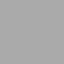

In [43]:
lv = lavavu.Viewer()
surf = lv.triangles('test')
surf.vertices(points)
surf.indices(tri)
cpoints = lv.points('points',size=10)
cpoints.vertices(points)
lv.control.Panel()
lv.control.show()

#lv.interactive()

In [29]:
boundary_points[0:2,:]

array([[    0.,     0.,     0.],
       [10000., 10000.,  5000.]])

In [20]:
boundary_points[0:1,:]

array([[0., 0., 0.]])

In [21]:
boundary_points[1,[0,2]]

array([10000.,  5000.])